### Topik Case:

**Clustering Nasabah Berdasarkan Pola Pengeluaran dan Preferensi Transaksi**

### Tujuan:

Mengelompokkan nasabah berdasarkan kebiasaan transaksi mereka untuk mendapatkan insight bisnis, misalnya:

* Preferensi kanal transaksi (Online, ATM, Branch).
* Pola pengeluaran (besar/kecil, rutin/sesekali).
* Preferensi merchant atau lokasi transaksi.
* Hubungan antara demografi (usia, pekerjaan) dengan pola transaksi.

### Fitur Utama:

1. **TransactionAmount** – rata-rata dan variasi pengeluaran.
2. **TransactionFrequency** – jarak antar transaksi (`TransactionDate` & `PreviousTransactionDate`).
3. **TransactionType** – proporsi debit vs kredit.
4. **Channel** – distribusi penggunaan kanal transaksi.
5. **MerchantID & Location** – preferensi merchant dan lokasi transaksi.
6. **AccountBalance** – pola saldo pasca-transaksi.
7. **CustomerAge & CustomerOccupation** – demografi yang mempengaruhi kebiasaan transaksi.
8. **TransactionDuration** – lama transaksi, bisa menunjukkan preferensi proses cepat vs lambat.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
df = pd.read_csv("../data/01_raw/bank_transactions_data_2.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [35]:
df_main_features = df[
    [
    "TransactionAmount",
    "TransactionDate",
    "PreviousTransactionDate",
    "TransactionType",
    "Channel",
    "MerchantID",
    "Location",
    "AccountBalance",
    "CustomerAge",
    "CustomerOccupation",
    "TransactionDuration"
]
]

In [36]:
df_main_features.sample(5)

,TransactionAmount,TransactionDate,PreviousTransactionDate,TransactionType,Channel,MerchantID,Location,AccountBalance,CustomerAge,CustomerOccupation,TransactionDuration
653,1919.11,2023-06-27 17:48:25,2024-11-04 08:10:27,Debit,ATM,M033,Portland,11090.24,30,Doctor,161
215,74.88,2023-05-24 16:25:50,2024-11-04 08:07:46,Debit,ATM,M026,Atlanta,420.67,25,Student,202
900,157.16,2023-03-13 17:34:30,2024-11-04 08:07:27,Debit,Branch,M068,New York,1545.77,20,Student,280
1908,494.66,2023-06-19 16:59:35,2024-11-04 08:06:25,Debit,Online,M009,Houston,5531.93,33,Doctor,110
383,96.54,2023-03-13 17:26:17,2024-11-04 08:10:31,Debit,Branch,M020,New York,7182.22,58,Retired,95


In [37]:
df_main_features.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2512 non-null   float64
 1   TransactionDate          2512 non-null   object 
 2   PreviousTransactionDate  2512 non-null   object 
 3   TransactionType          2512 non-null   object 
 4   Channel                  2512 non-null   object 
 5   MerchantID               2512 non-null   object 
 6   Location                 2512 non-null   object 
 7   AccountBalance           2512 non-null   float64
 8   CustomerAge              2512 non-null   int64  
 9   CustomerOccupation       2512 non-null   object 
 10  TransactionDuration      2512 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 216.0+ KB


ada beberapa yang tidak sesuai tipe data nya
1. transaction date masih object
2. previous transactionDate masih object

akan kita fix dulu untuk kebutuhan EDA

In [38]:
df_main_features["TransactionDate"] = pd.to_datetime(df_main_features["TransactionDate"])
df_main_features["PreviousTransactionDate"] = pd.to_datetime(df_main_features["PreviousTransactionDate"])

/tmp/ipykernel_4164/3460292927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_features["TransactionDate"] = pd.to_datetime(df_main_features["TransactionDate"])
/tmp/ipykernel_4164/3460292927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_features["PreviousTransactionDate"] = pd.to_datetime(df_main_features["PreviousTransactionDate"])


In [39]:
df_main_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   PreviousTransactionDate  2512 non-null   datetime64[ns]
 3   TransactionType          2512 non-null   object        
 4   Channel                  2512 non-null   object        
 5   MerchantID               2512 non-null   object        
 6   Location                 2512 non-null   object        
 7   AccountBalance           2512 non-null   float64       
 8   CustomerAge              2512 non-null   int64         
 9   CustomerOccupation       2512 non-null   object        
 10  TransactionDuration      2512 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 216.0+ KB


In [40]:
df_main_features.isnull().sum()

TransactionAmount          0
TransactionDate            0
PreviousTransactionDate    0
TransactionType            0
Channel                    0
MerchantID                 0
Location                   0
AccountBalance             0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
dtype: int64

In [41]:
df_main_features.duplicated().sum()

0

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [45]:
df_main_features_numerical = df_main_features.select_dtypes(include=["float64", "int64"])
df_main_features_categorical = df_main_features.select_dtypes(include=["object"])

In [46]:
df_main_features_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   AccountBalance       2512 non-null   float64
 2   CustomerAge          2512 non-null   int64  
 3   TransactionDuration  2512 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 78.6 KB


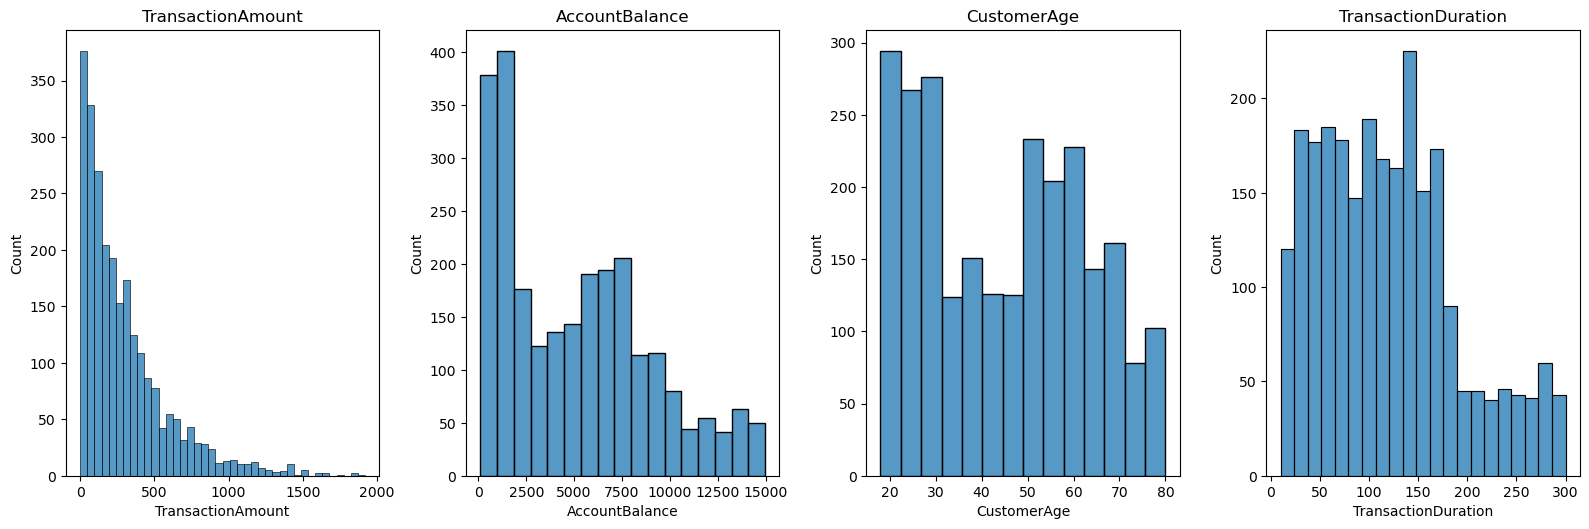

In [51]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_main_features_numerical.columns):
    ax = fig.add_subplot(2, 5, i + 1)
    sns.histplot(x=df_main_features_numerical[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

ada beberap data yang skew/miring, seperti :
1. transcation amount yang ternyata miring ke kanan
2. account balance yang ternyata miring ke kanan juga
3. customer age juga sama

mendekati normal hanya transaction duration 

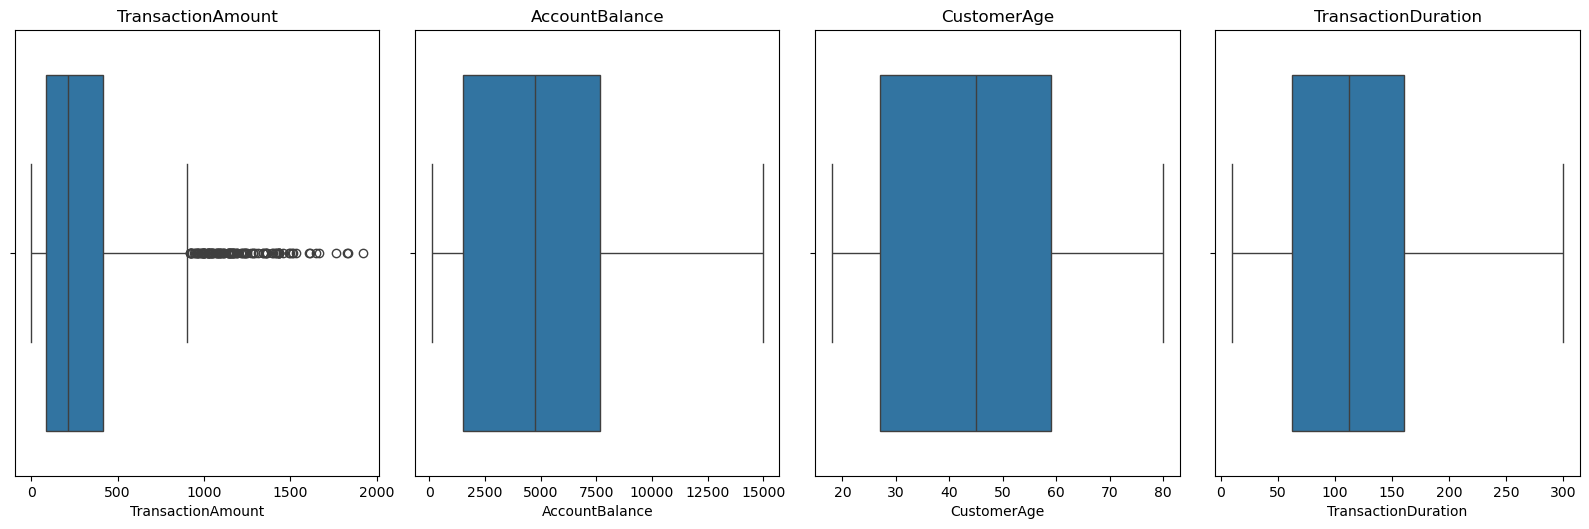

In [52]:
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(df_main_features_numerical.columns):
    ax = fig.add_subplot(2, 5, i + 1)
    sns.boxplot(x=df_main_features_numerical[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

dalam pengecekan outliers, ada satu column yang memiliki outliers, yaitu column transcation amount, mungkin nanti fix nya lebih ke arah mengganti ke nilai max terdekat, karna trade off nya data yang kecil hanya 2k baris

In [53]:
df_main_features_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TransactionType     2512 non-null   object
 1   Channel             2512 non-null   object
 2   MerchantID          2512 non-null   object
 3   Location            2512 non-null   object
 4   CustomerOccupation  2512 non-null   object
dtypes: object(5)
memory usage: 98.3+ KB


In [54]:
df_main_features_categorical["TransactionType"].value_counts()

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

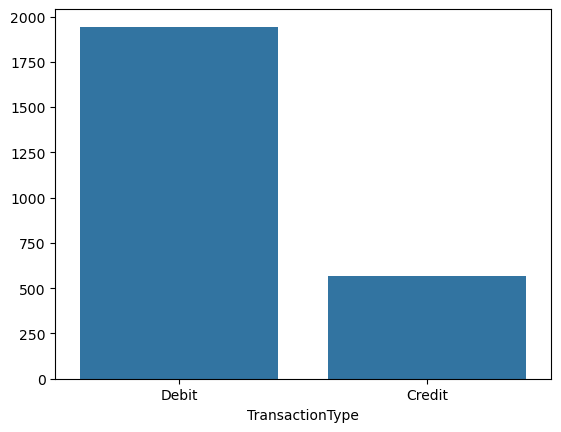

In [ ]:
sns.barplot(x=df_main_features_categorical["TransactionType"].value_counts().index, 
            y=df_main_features_categorical["TransactionType"].value_counts().values
           )
plt.show()

distribusi transaksi kredit lebih besar daripada debit, masuk kategori data unbalance

In [57]:
df_main_features_categorical["Channel"].value_counts()

Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

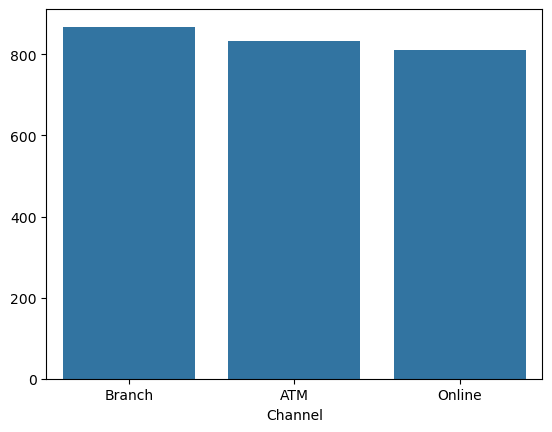

In [58]:
sns.barplot(
    x=df_main_features_categorical["Channel"].value_counts().index,
    y=df_main_features_categorical["Channel"].value_counts().values
)
plt.show()

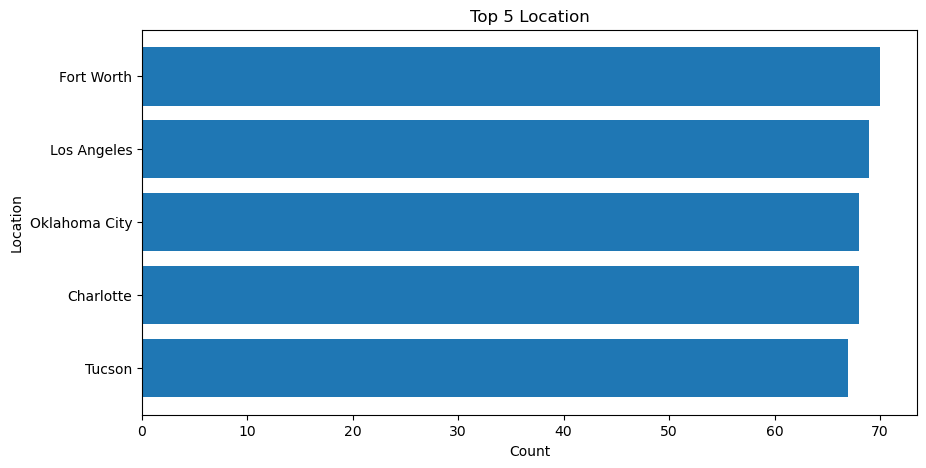

In [66]:
top5 = df_main_features_categorical["Location"].value_counts().head(5)

plt.figure(figsize=(10, 5))
plt.barh(top5.index[::-1], top5.values[::-1]) 
plt.xlabel("Count")
plt.ylabel("Location")
plt.title("Top 5 Location")
plt.show()

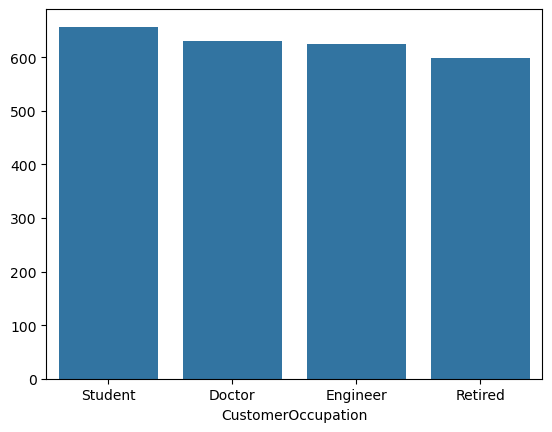

In [68]:
sns.barplot(
    x=df_main_features_categorical["CustomerOccupation"].value_counts().index,
    y=df_main_features_categorical["CustomerOccupation"].value_counts().values
)
plt.show()

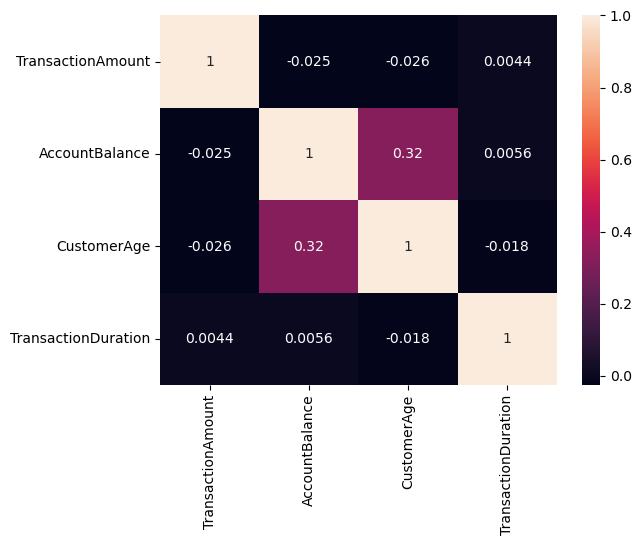

In [69]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
sns.heatmap(
    df_main_features_numerical.corr(),
    annot=True
)
plt.show()

<Axes: xlabel='TransactionDate', ylabel='TransactionAmount'>

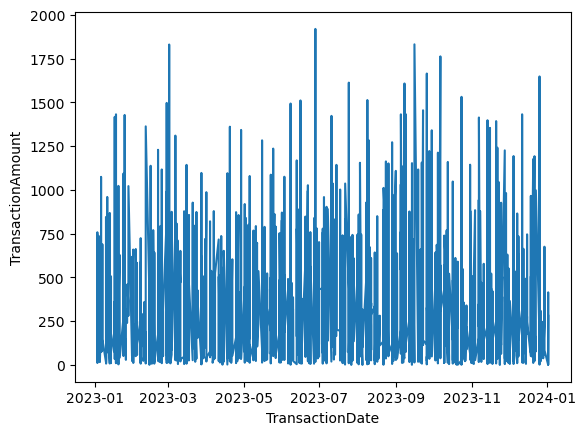

In [72]:
sns.lineplot(
    x=df_main_features["TransactionDate"],
    y=df_main_features_numerical["TransactionAmount"]
)

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# sudah dilakukan di atas

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# sudah dilakankan di atas

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
# sudah dilakukan di atas

In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
# sudah dilakukan di atas

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

In [21]:
# Menggunakan algoritma K-Means Clustering

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [24]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [29]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.